# PACKAGES USED

In [1]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import pandas as pd
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mean_squared_error

# Single user tweet sentiment analysis

In [2]:
consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_token_secret = '***'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
api

In [41]:
a=api.user_timeline("realDonaldTrump",count=1000)
c=[]
tweet=[]
sen=[]
dates=[]
fc=[]
for i in a:
    twe={}
    t=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", i.text).split())
    if t:
        twe[t]=int(i.retweet_count)
        fc.append(int(i.favorite_count))
        dates.append(i._json.get("created_at"))
        c.append(int(i.retweet_count))
        analysis = TextBlob(t)
        if analysis.sentiment.polarity > 0:
            twe['sentiment']= 'positive'
            sen.append('positive')
        elif analysis.sentiment.polarity == 0:
            twe['sentiment']= 'neutral'
            sen.append('neutral')
        else:
            twe['sentiment']= 'negative'
            sen.append('negative')
        tweet.append(twe)
c[1:5]

[31315, 23981, 13952, 87945]

In [40]:
a[1]

Status(_api=<tweepy.api.API object at 0x7ff5e1e37fd0>, _json={'created_at': 'Fri Oct 30 00:04:08 +0000 2020', 'id': 1321966078638100480, 'id_str': '1321966078638100480', 'text': 'The Fake News refuses to cover the fact that GDP went up 33.1% for the 3rd Quarter, the best number by far in our Country’s history!', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America🇺🇸', 'url': 'https://t.co/8f9VFxztEJ', 'entities': {'url': {'urls': [{'url': 'https://t.co/8f9VFxztEJ', 'expanded_url': 'http://Vot

In [5]:
df=pd.DataFrame()
df['rtc']=c
df
print(c)

[28944, 22373, 13176, 84381, 20882, 19115, 14819, 14214, 11440, 12117, 10560, 15064, 29982, 22695, 8409, 16658, 36346, 10867, 9966, 19580, 35596, 17470, 9456, 11251, 17084, 35319, 58196, 14230, 25308, 13629, 15641, 10755, 24974, 13600, 23606, 20219, 10233, 68681, 52337, 47103, 12086, 55382, 10236, 8495, 18001, 32036, 9552, 6042, 21258, 29020, 33865, 22498, 12416, 10456, 12859, 45975, 19810, 12659, 8578, 21923, 10198, 14373, 16901, 19706, 12733, 13113, 17783, 8646, 30409, 27737, 9963, 21011, 20498, 17153, 34470, 9227, 9093, 6636, 8719, 8236, 6068, 11059, 15812, 33865, 13728, 20358, 19625, 19056, 28208, 21399, 5317, 13940, 4777, 4410, 14826, 30771, 4148, 7666, 3868, 11184, 4572, 6647, 6384, 6086, 6323, 7450, 6724, 37272, 27197, 14045, 6780, 5236, 7403, 3359, 10145, 5063, 6876, 4090, 6441, 7215, 10632, 6473, 3357, 8936, 5872, 16005, 7924, 12388, 7117, 5519, 26405, 23631, 8394, 11134, 10312, 8135, 4616, 9439, 15607, 7844, 15897, 3579, 52331, 9562, 24742, 8538, 6478, 10515, 37963, 13346, 22

In [6]:
'''lab=['rtc']
result = df.copy()
for feature_name in lab:
      max_value = df[feature_name].max()
      min_value = df[feature_name].min()
      result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
result'''

"lab=['rtc']\nresult = df.copy()\nfor feature_name in lab:\n      max_value = df[feature_name].max()\n      min_value = df[feature_name].min()\n      result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)\nresult"

# Prediction of reach of retweets

In [7]:
import matplotlib.pyplot as plt 
def estimate_coef(x, y): 
    n = np.size(x) 
    m_x, m_y = np.mean(x), np.mean(y) 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
    y_pred = b[0] + b[1]*x 
    plt.plot(x, y_pred, color = "g") 
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.show() 

In [8]:
import numpy as np
x=list(range(0,len(c)))
xt=np.array(x)
yt=np.array(c)
b = estimate_coef(xt,yt)
print(math.floor(len(c)*b[0]+b[1]))

3520934


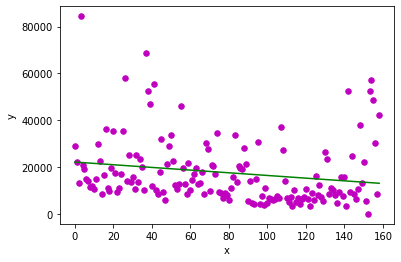

In [9]:
plot_regression_line(xt, yt, b) 

# Different Visualisations

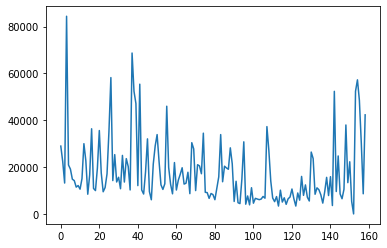

In [10]:
plt.plot(yt)

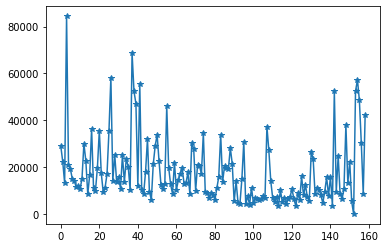

In [11]:
plt.plot(yt,marker='*',animated=True)

<BarContainer object of 159 artists>

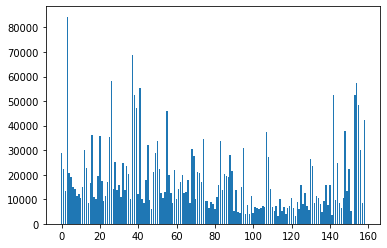

In [12]:
plt.bar(xt,yt)

(array([41., 58., 29., 11.,  8.,  4.,  6.,  0.,  1.,  1.]),
 array([    0. ,  8438.1, 16876.2, 25314.3, 33752.4, 42190.5, 50628.6,
        59066.7, 67504.8, 75942.9, 84381. ]),
 <a list of 10 Patch objects>)

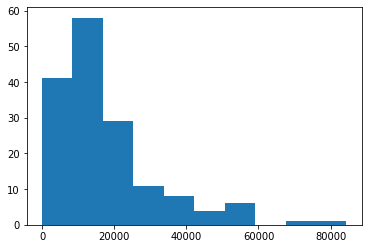

In [13]:
plt.hist(c)

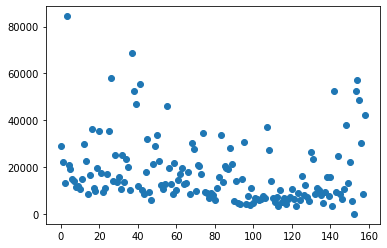

In [14]:
plt.scatter(x,c)

In [15]:
cp=0
cn=0
cne=0
for i in tweet:
    if i['sentiment']=='positive':
        cp+=1
    elif i['sentiment']=='neutral':
        cne+=1
    else:
        cn+=1
pos=cp/len(tweet)
neg=cn/len(tweet)
neu=cne/len(tweet)
v=[pos,neg,neu]
lab=['positive','negative','neutral']

([<matplotlib.patches.Wedge at 0x7ff5e4283f10>,
 [Text(0.3249832622345182, 1.103125504766983, 'positive'),
  Text(-1.1479802978472744, 0.06812661561007763, 'negative'),
  Text(0.2590628132710981, -1.1204402968387313, 'neutral')])

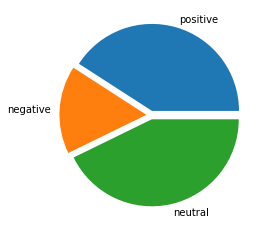

In [16]:
plt.pie(v,labels=lab,explode=[0.05,0.05,0.05])

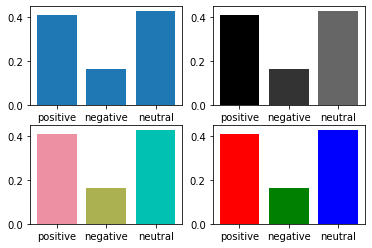

In [17]:
f,p=plt.subplots(2,2)
p[0][0].bar(lab,v)
p[0][1].bar(lab,v,color=['#000000','#333333','#666666','#999999','#ffffff'])
p[1][0].bar(lab,v,color=["#ED90A4" ,"#ABB150" ,"#00C1B2", "#ACA2EC"])
p[1][1].bar(lab,v,color=["r","g","b"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5e4465110>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5e4465bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5e445c490>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5e446d650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5e446db50>],
 'means': []}

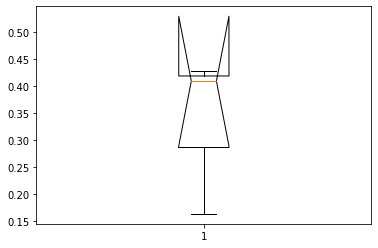

In [18]:
plt.boxplot(v,notch=True)

# PREDICTION OF RETWEETS

In [42]:
data=pd.DataFrame()
data['s']=sen
data['fc']=fc
data['rtc']=c
data
data2=data
data2['dates']=dates
data2.to_excel("temp.xlsx")

In [43]:
for j in data.columns:
  if(data[j].dtype=="object"):
    x=data[j].unique()
    d={}
    for i in range(len(x)):
      d[x[i]]=i
    data=data.replace({j:d})
data.head()

,s,fc,rtc,dates
0,0,20597,5229,0
1,1,128318,31315,1
2,0,89045,23981,2
3,2,66519,13952,3
4,1,0,87945,4


In [44]:
X=np.array(data.iloc[:,0:len(data.columns)-1])
Y=np.array(data.iloc[:,len(data.columns)-1])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [46]:
regr = LinearRegression().fit(X_train,y_train)

In [47]:
v=regr.predict(X_test)

In [48]:
regr.score(X_test,y_test)

0.22831265534104317

In [49]:
scores=[]
d={}
cv = KFold(n_splits=25)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))
    t=[]
    t.append(X_train)
    t.append(y_train)
    t.append(X_test)
    t.append(y_test)
    scores.append(regr.score(X_test, y_test))
    d[regr.score(X_test, y_test)]=t
v=max(d.keys())
scores

[-2046.3164089048187,
 -2046.3164089048187,
 -1234.392578083671,
 -1234.392578083671,
 -876.1628522069694,
 -876.1628522069694,
 -615.8667901143452,
 -615.8667901143452,
 -511.99005353446717,
 -511.99005353446717,
 -295.98116541397604,
 -295.98116541397604,
 -301.1100961016421,
 -301.1100961016421,
 -176.6376511494615,
 -176.6376511494615,
 -89.32559493264439,
 -89.32559493264439,
 -89.93644849785139,
 -89.93644849785139,
 -59.96645412304611,
 -59.96645412304611,
 -69.62165418455236,
 -69.62165418455236,
 -159.72547676210266,
 -159.72547676210266,
 -98.88110979267384,
 -98.88110979267384,
 -35.06603472692143,
 -35.06603472692143,
 -82.30041769582344,
 -82.30041769582344,
 -1171.80375879176,
 -1171.80375879176,
 -206.73311519664895,
 -206.73311519664895,
 -273.65494582806565,
 -273.65494582806565,
 -447.8507542159341,
 -447.8507542159341,
 -1057.1766465756896,
 -1057.1766465756896,
 -1062.036714455219,
 -1062.036714455219,
 -1513.177482465249,
 -1513.177482465249,
 -1235.7535152225564,


In [50]:
pred=regr.predict(d[v][2])
pred

array([100.69303107,  75.80105893,  76.9862444 ,  95.06674921,
        86.39647437,  95.19647587])

In [51]:
rmse = (np.sqrt(mean_squared_error(d[v][3], pred)))
print(rmse)

12.434930414333703


NameError: name 'LogisticRegression' is not defined